# Visualizations of predictions

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from utils import preprocess

# Setting Matplotlib default parameters
plt.rcParams.update( {'font.size':14} )

# Helper function to visualize predictions

In [2]:
def visualize_predictions(prediction_horizon, dataset):
    """
    Loads the dataset, loads the trained models, makes a prediction on a random sample and creates a visualization
    
    Arguments:
    ----------
    prediction_horizon      -    int
                                 prediction window size of the target TS
    dataset                 -    str
                                 name of the dataset
    
    Returns:
    --------
    
    """
    # Load the dataset
    file_path  = 'data/' + dataset + '_' + str(prediction_horizon) + '-step.hdf5'
    x, y, true_mean, true_std = preprocess.load_hdf5( file_path )
    # Choose a random sample
    sample     = np.random.randint( x.shape[0] )
    x_sample   = x[sample,:]
    y_sample   = y[sample,:]
    # Load the trained models
    lstm_path  = 'trained_models/' + dataset + '_simple_LSTM_' + str(prediction_horizon) + '-step/fold_5_model.h5'
    acrnn_path = 'trained_models/' + dataset + '_ACRNN_' + str(prediction_horizon) + '-step/fold_5_model.h5'
    lstm       = tf.keras.models.load_model(lstm_path) 
    acrnn      = tf.keras.models.load_model(acrnn_path) 
    # Obtain predictions from the loaded models
    y_lstm     = lstm.predict(  x_sample[np.newaxis,...] )
    y_acrnn    = acrnn.predict( x_sample[np.newaxis,...] )
    # Project data back to original scale
    x_sample   = preprocess.unscale_data( x_sample, true_mean, true_std )
    y_sample   = preprocess.unscale_data( y_sample, true_mean, true_std )
    y_lstm     = preprocess.unscale_data( y_lstm ,  true_mean, true_std )
    y_acrnn    = preprocess.unscale_data( y_acrnn,  true_mean, true_std )
    # Reshaping to correct dimensions
    window_size= x_sample.shape[0]
    x_sample   = x_sample.reshape((window_size,1))
    y_sample   = y_sample.reshape((prediction_horizon,1))
    y_lstm     = y_lstm.reshape((prediction_horizon,1))
    y_acrnn    = y_acrnn.reshape((prediction_horizon,1))
    
    # Plot the input TS, target TS and the predicted TS
    fig = plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.plot( np.arange(window_size), x_sample, color='b', ls='-', marker='o', lw=0.5, label='input TS')
    plt.plot( np.arange(window_size-1,window_size+prediction_horizon), 
              np.concatenate(( x_sample[-1].reshape(-1,1), y_sample )),
              marker='x', color='k', ls='-', lw=0.5, label='target TS')
    plt.plot( np.arange(window_size-1,window_size+prediction_horizon), 
              np.concatenate(( x_sample[-1].reshape(-1,1), y_lstm )), 
              marker='o', color='g', ls=(0,(5,10)), lw=0.5, label='predicted TS - LSTM')
    plt.plot( np.arange(window_size-1,window_size+prediction_horizon),
              np.concatenate(( x_sample[-1].reshape(-1,1), y_lstm )), 
              marker='d', color='r', ls=(0, (3, 5, 1, 5, 1, 5)), lw=1, label='predicted TS - ACRNN')
    # Formatting
    ax = fig.axes[0]
    ax.set_xticks( np.arange(window_size+prediction_horizon) )
    ax.set_xticklabels( np.arange(window_size+prediction_horizon) )
    plt.xlabel('Time steps [-]')
    plt.ylabel('{} [-]'.format(dataset.capitalize() ))
    plt.legend()
    plt.title('{}-step TS predictions for data sample #{}'.format(prediction_horizon, sample) )
    fig_name = 'figures/' + str(prediction_horizon) + '-step_' + dataset + '.png' 
    fig.savefig(fig_name)
    plt.show()

# 1. Temperature Dataset
## 1.1. 1-step TS prediction

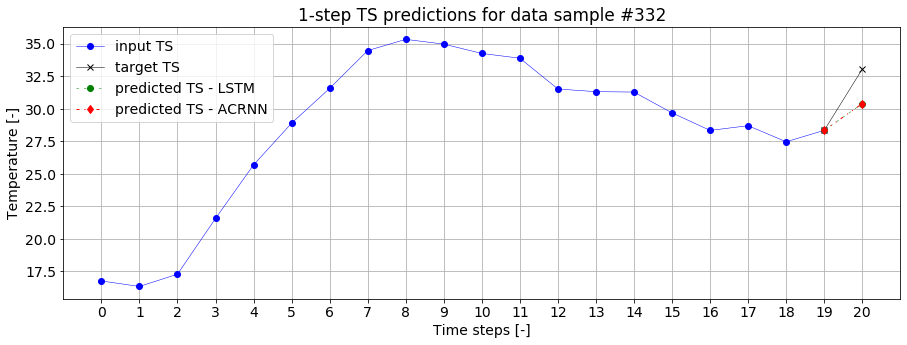

In [3]:
visualize_predictions(1, 'temperature')

## 1.2. 3-step TS prediction

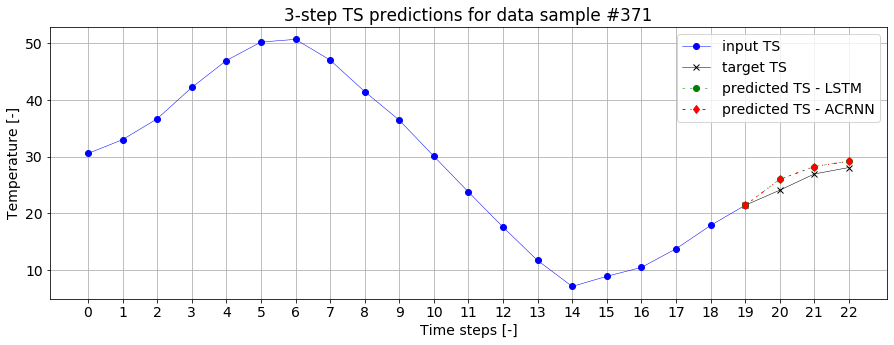

In [4]:
visualize_predictions(3, 'temperature')

## 1.3. 5-step TS prediction

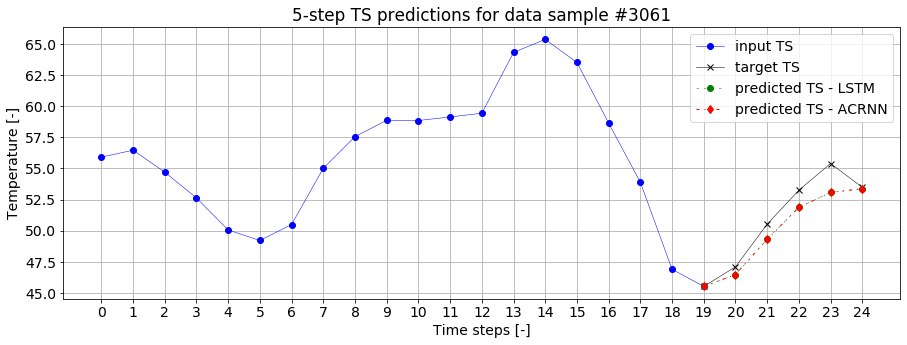

In [5]:
visualize_predictions(5, 'temperature')

## 1.4. 7-step TS prediction

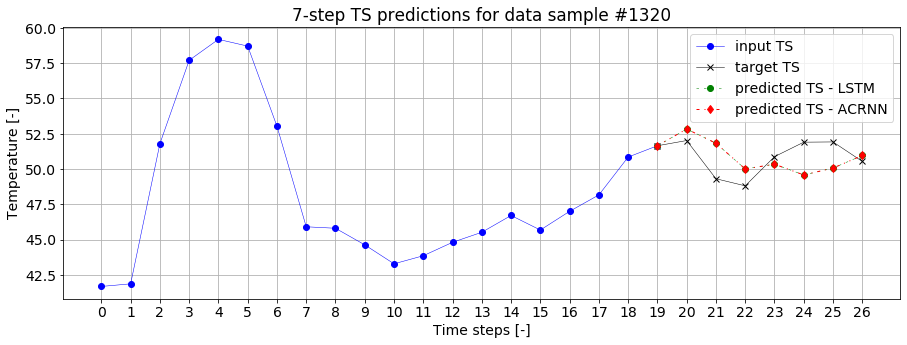

In [6]:
visualize_predictions(7, 'temperature')

# 2. Sunspot dataset
## 2.1. 1-step TS prediction

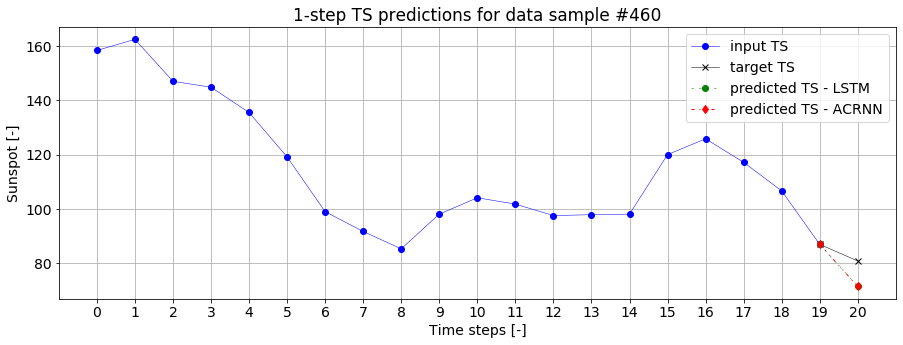

In [7]:
visualize_predictions(1, 'sunspot')

## 2.2. 3-step TS prediction

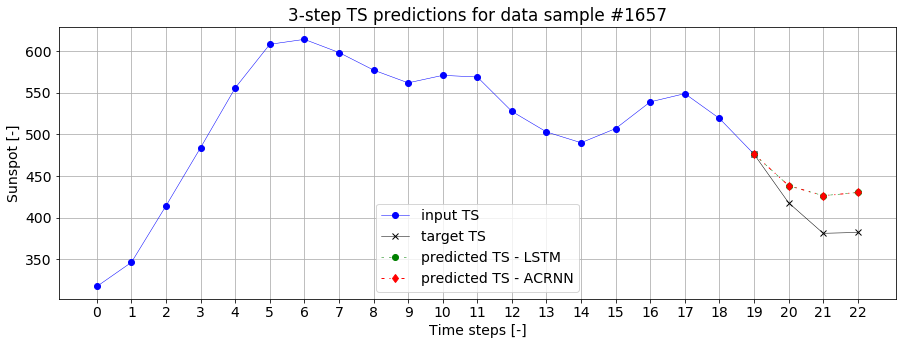

In [8]:
visualize_predictions(3, 'sunspot')

## 2.3. 5-step TS prediction

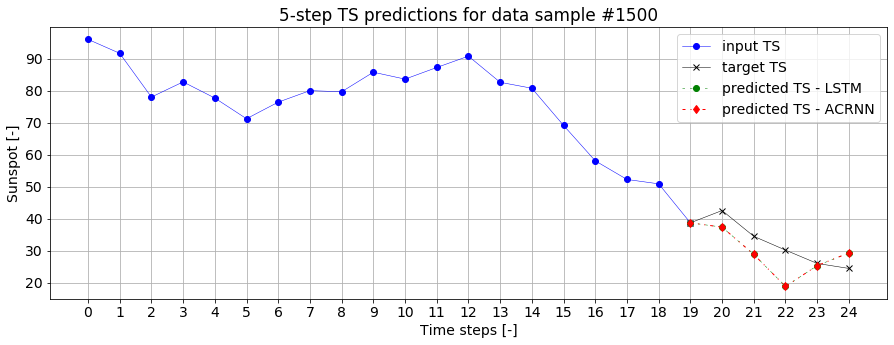

In [9]:
visualize_predictions(5, 'sunspot')

## 2.4. 7-step TS prediction

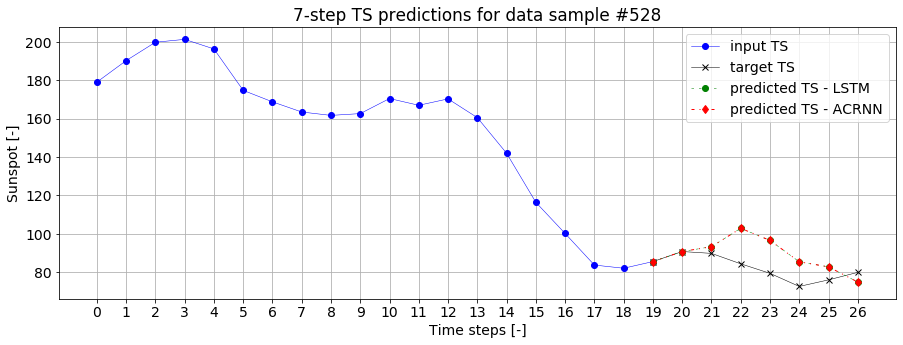

In [10]:
visualize_predictions(7, 'sunspot')